# Comparative Analysis of Air Quality and Water Pollution

This study utilizes a comprehensive dataset sourced from Kaggle that provides air quality and water pollution metrics for over 5,000 cities worldwide (City API IO, n.d.). Understanding the relationship between urbanization and pollution levels is crucial for researchers, policymakers, and environmentalists as they strive to implement effective environmental management practices. The insights derived from this dataset can help identify trends, establish benchmarks, and formulate policies aimed at improving both air and water quality, ultimately contributing to public health and environmental sustainability (World Health Organization, n.d.; United Nations Environment Programme, 2019).

## Dataset Overview

- **Data Source**: Kaggle (World Cities Air Quality and Water Pollution)
- **Total Entries**: The dataset contains information on **5,000+ cities**.
- **Columns**: The dataset comprises the following key columns:

  | Column Name     | Description                                               | Data Type  | Example Values                    |
  |------------------|-----------------------------------------------------------|------------|-----------------------------------|
  | `City`           | The name of the city                                      | String     | "New York", "Beijing"            |
  | `Region`         | The region or state where the city is located            | String     | "New York", "Beijing"            |
  | `Country`        | The country of the city                                   | String     | "USA", "China"                   |
  | `AirQuality`     | The average air quality index (AQI)                      | Float      | 45.3, 150.7                       |
  | `WaterPollution` | The average water pollution index                          | Float      | 25.0, 85.5                        |
  | `Population`     | The population of the city                                | Integer    | 8,419,600, 21,542,000             |
  | `Latitude`       | The geographic latitude of the city                       | Float      | 40.7128, 39.9042                  |
  | `Longitude`      | The geographic longitude of the city                      | Float      | -74.0060, 116.4074                |

## Data Types and Counts

The dataset includes 3963 rows with 5 columns, making it a relatively small dataset.

- **String**: Represents categorical data (e.g., City, Region, Country).
- **Float**: Represents continuous numerical data for pollution indices (e.g., AirQuality, WaterPollution).
- **Integer**: Represents whole number data (e.g., Population).

## Summary Statistics

- **Air Quality**: Values typically range from **0** (good air quality) to **300** (hazardous).
- **Water Pollution**: Values typically range from **0** (clean water) to **100+** (very polluted).
- **Population**: Varies significantly across cities, providing insights into urbanization and its potential impact on pollution levels (Institute for Health Metrics and Evaluation, n.d.; World Bank, n.d.).


### License
The dataset is publicly available on Kaggle and is covered under the platform’s licensing agreement, which typically allows free usage for research and analysis.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Loading Data


In [17]:
df_master = pd.read_csv('cities_air_quality_water_pollution.18-10-2021.csv')
df = df_master.copy()
df.head()

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


# Data Cleaning and Preprocessing

In [18]:
print(df.isnull().sum())
df.info()

City                 0
 "Region"            0
 "Country"           0
 "AirQuality"        0
 "WaterPollution"    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [19]:
# removing quotes from the columns
df.replace({'"': ''}, regex=True, inplace=True)

# removing leading and trailing whitespaces
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# removing leading and trailing whitespaces from column names
df.columns = df.columns.str.strip().str.replace('"', '').str.replace(' ', '')

df.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


In [20]:
# Dropping Region column

df = df.drop(columns = ["Region"])

# Creating AirPollution column

def subtraction_100(x):
    return 100 - x

df["AirPollution"] = df['AirQuality'].apply(subtraction_100)

# Creating WaterQuality column

df["WaterQuality"] = df['WaterPollution'].apply(subtraction_100)

df.head()

,City,Country,AirQuality,WaterPollution,AirPollution,WaterQuality
0,New York City,United States of America,46.816038,49.504950,53.183962,50.495050
1,"Washington, D.C.",United States of America,66.129032,49.107143,33.870968,50.892857
2,San Francisco,United States of America,60.514019,43.000000,39.485981,57.000000
3,Berlin,Germany,62.364130,28.612717,37.635870,71.387283
4,Los Angeles,United States of America,36.621622,61.299435,63.378378,38.700565


# Research Sub Questions

1. **What are the top 10 most polluted and cleanest countries in terms of air pollution and water pollution?**

2. **What are the outlier patterns observed when comparing air quality and water quality across different countries?**

3. **What kind of relationship exists between average air quality and average water quality in various regions?**


## 1. What are the top 10 most polluted and cleanest countries in terms of air pollution and water pollution?

### Top 10 Air polluted countries 

/var/folders/29/httfxy392318fgqt38j1wr7c0000gp/T/ipykernel_60395/2611562018.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="AirPollution", y=y, data=top_10_air_pollution, palette=colors)


Text(50, 1.3, 'Overall Average:\n47.33')

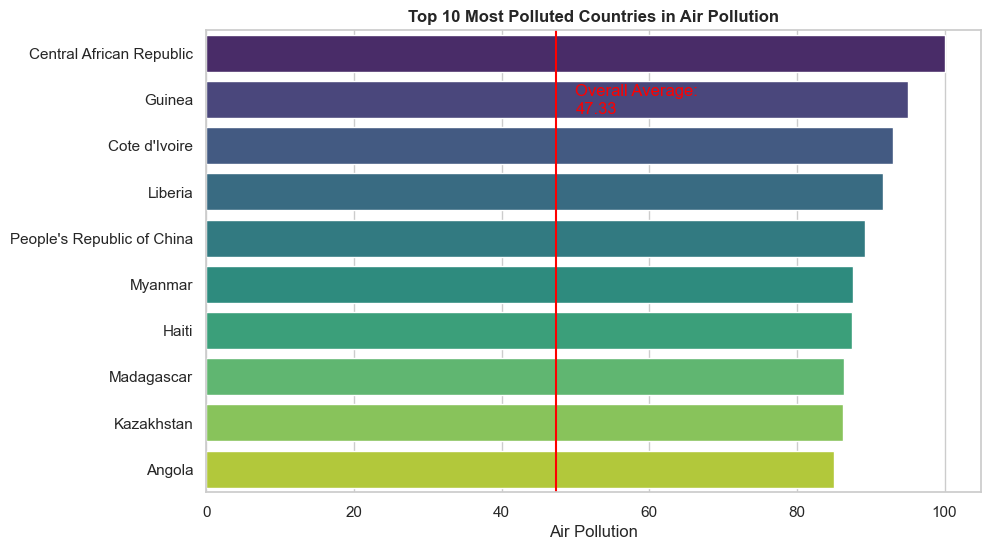

In [21]:
average_air_pollution = df.groupby("Country", as_index=False).agg({"AirPollution": "mean"})
top_10_air_pollution = average_air_pollution.sort_values("AirPollution", ascending=False).head(10)

# Overall Avg. Air Pollution
overall_avg_air_pol = average_air_pollution["AirPollution"].mean()

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
y = top_10_air_pollution["Country"]

# Color gradient for the bars
colors = sns.color_palette("viridis", len(top_10_air_pollution))

ax1 = sns.barplot(x="AirPollution", y=y, data=top_10_air_pollution, palette=colors)
ax1.set_title("Top 10 Most Polluted Countries in Air Pollution", fontweight="bold")
ax1.axvline(x=overall_avg_air_pol, ymin=0, ymax=1, color="red")
ax1.set_xlabel("Air Pollution")
ax1.set_ylabel("")
ax1.text(x=50, y=1.3, s="Overall Average:\n{}".format(round(overall_avg_air_pol, 2)), color="red")


#### Key Observations:
1. **Highest Pollution**: The Central African Republic has the highest air pollution score, significantly above the overall average.
2. **Other High-Polluting Countries**: Guinea, Cote d'Ivoire, and Liberia also show high levels of air pollution, with scores above the average line.
3. **China’s Position**: The People’s Republic of China is positioned in the middle of this list, which indicates a relatively high pollution level compared to the global context, though still below the top few.
4. **Below-Average Countries**: Angola, Kazakhstan, and Madagascar show pollution levels below the overall average but are still among the top 10 most polluted countries.


### Top 10 Water Polluted Countries

/var/folders/29/httfxy392318fgqt38j1wr7c0000gp/T/ipykernel_60395/2421161937.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="WaterPollution", y=y, data=top_10_water_pollution, palette=colors)


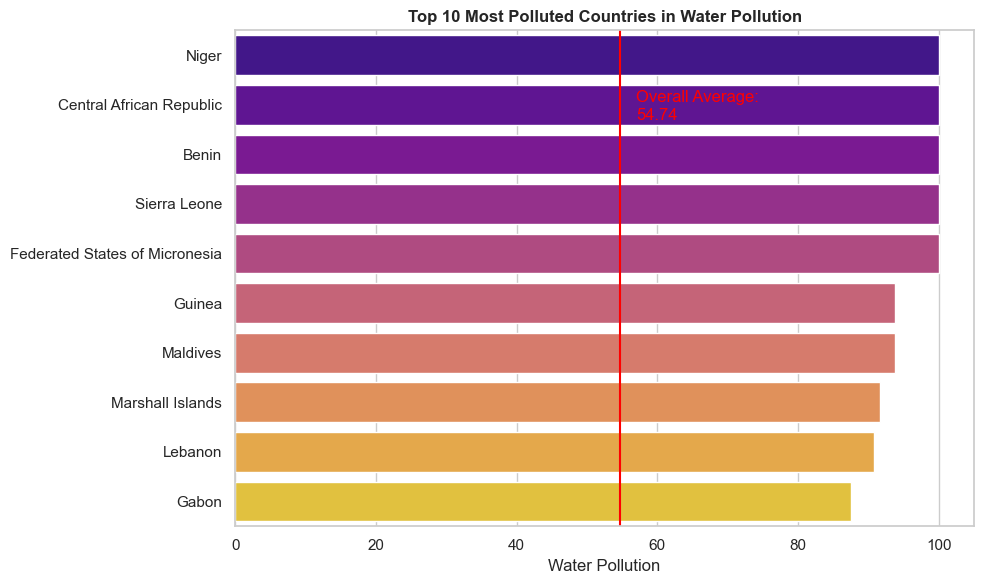

In [22]:

average_water_pollution = df.groupby("Country", as_index=False).agg({"WaterPollution": "mean"})
top_10_water_pollution = average_water_pollution.sort_values("WaterPollution", ascending=False).head(10)

# Overall Avg. Water Pollution
overall_avg_water_pol = average_water_pollution["WaterPollution"].mean()

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
y = top_10_water_pollution["Country"]

# Create a color gradient for the bars
colors = sns.color_palette("plasma", len(top_10_water_pollution))

ax2 = sns.barplot(x="WaterPollution", y=y, data=top_10_water_pollution, palette=colors)
ax2.set_title("Top 10 Most Polluted Countries in Water Pollution", fontweight="bold")
ax2.axvline(x=overall_avg_water_pol, ymin=0, ymax=1, color="red")
ax2.set_xlabel("Water Pollution")
ax2.set_ylabel("")
ax2.text(x=57, y=1.3, s="Overall Average:\n{}".format(round(overall_avg_water_pol, 2)), color="red")

plt.tight_layout()
plt.show()

#### Key Observations:

1. **Highest Pollution**: Niger ranks as the country with the highest water pollution level, significantly exceeding the overall average.
2. **Other High-Polluting Countries**: The Central African Republic, Benin, and Sierra Leone show high levels of water pollution, all scoring above the average.
3. **Micronesia's Position**: The Federated States of Micronesia is ranked fifth, showing moderate water pollution levels, though still above the average.
4. **Below-Average Countries**: Gabon and Lebanon exhibit water pollution levels that are relatively lower, but they remain among the top 10 most polluted countries.

This graph highlights the pressing issue of water pollution in various African and Pacific regions, emphasizing the need for stronger water management and environmental protection policies in these areas.

## Top 10 Cleanest Countries in terms of Air Quality

<Figure size 1500x1000 with 0 Axes>

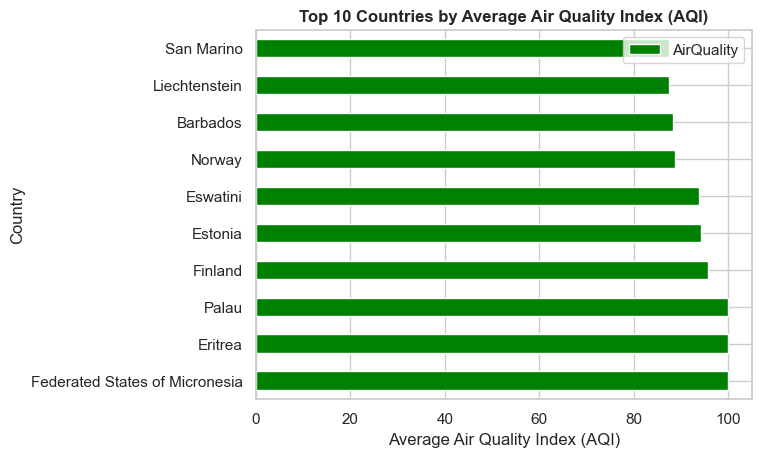

In [8]:
top_10_air_quality = df.groupby("Country").agg({"AirQuality": "mean"}).sort_values("AirQuality", ascending=False).head(10)
# Create the bar plot
plt.figure(figsize=(15, 10))
top_10_air_quality.plot(kind="barh", color="green", legend=True)

# Add labels and title
plt.xlabel('Average Air Quality Index (AQI)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Average Air Quality Index (AQI)', fontweight="bold")

# Show the plot
plt.show()

1. **Countries with Highest Air Quality**: The countries listed in the graph are those with the highest average AQI scores, indicating better air quality.
2. **Bar Heights**: The height of each bar represents the average AQI score for each country. Higher bars indicate better air quality.
3. **Color**: The bars are colored green, emphasizing the positive aspect of higher air quality.
4. **Labels and Title**: The x-axis is labeled with the average AQI scores, and the y-axis lists the countries. The title of the graph is "Top 10 Countries by Average Air Quality Index (AQI)".


## Top 10 Cleanest Countries in terms of Water Quality

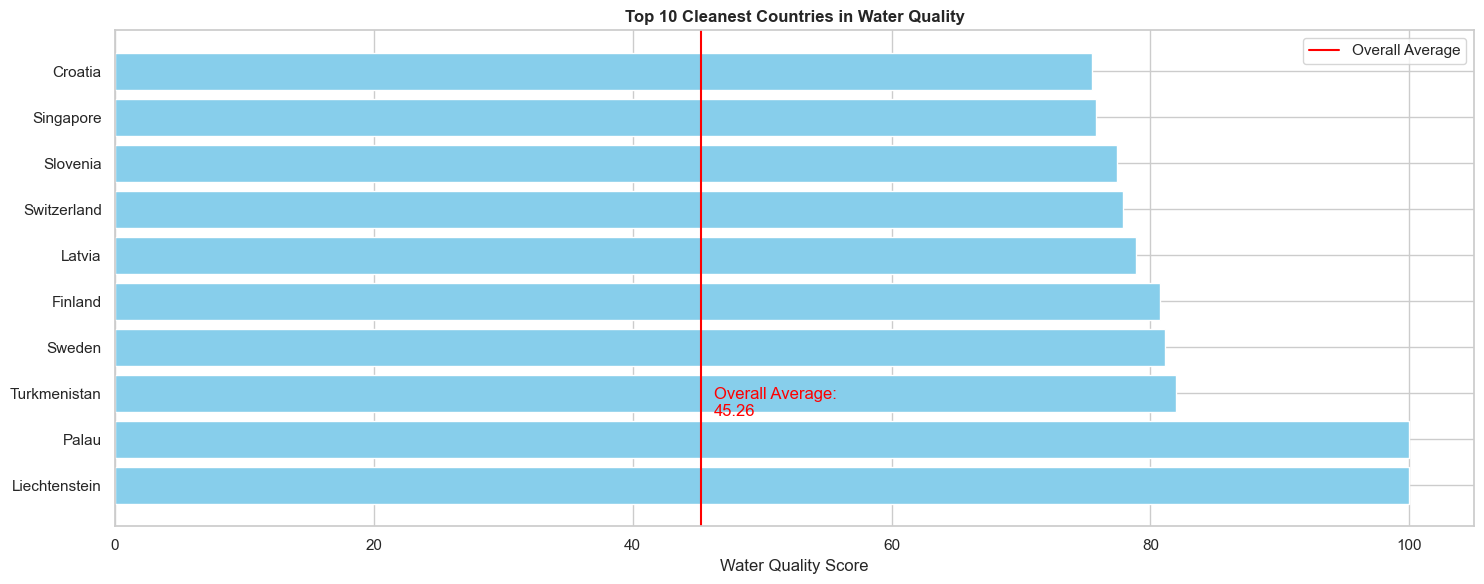

In [9]:
# Group by country and calculate the mean WaterQuality, then sort and get top 10
average_water_quality = df.groupby("Country", as_index=False).agg({"WaterQuality": "mean"})
top_10_water_quality = average_water_quality.sort_values("WaterQuality", ascending=False).head(10)

# Overall Average Water Quality Score
overall_avg_water_qual = average_water_quality["WaterQuality"].mean()

# Create the figure and axis
plt.figure(figsize=(15, 6))

# Create the bar plot using matplotlib
plt.barh(top_10_water_quality["Country"], top_10_water_quality["WaterQuality"], color="skyblue")

# Add title and labels
plt.title("Top 10 Cleanest Countries in Water Quality", fontweight="bold")
plt.xlabel("Water Quality Score")
plt.ylabel("")

# Add a vertical line for the overall average
plt.axvline(x=overall_avg_water_qual, color="red", label="Overall Average")

# Annotate the overall average value
plt.text(overall_avg_water_qual + 1, 1.5, "Overall Average:\n{}".format(round(overall_avg_water_qual, 2)), color="red")

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

#### Key Observations
- **Countries**: Croatia, Singapore, Slovenia, Switzerland, Latvia, Finland, Sweden, Turkmenistan, Palau, Liechtenstein.
- **Water Quality Score**: Each country has a score close to **100** (X-axis).
- **Overall Average**: Marked by the red line, the global average water quality score is **45.26**.
- **Comparison**: All listed countries significantly exceed the global average, indicating their superior water quality.

# 2. What are the outlier patterns observed when comparing air quality and water quality across different countries?

/var/folders/29/httfxy392318fgqt38j1wr7c0000gp/T/ipykernel_60395/3842443737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


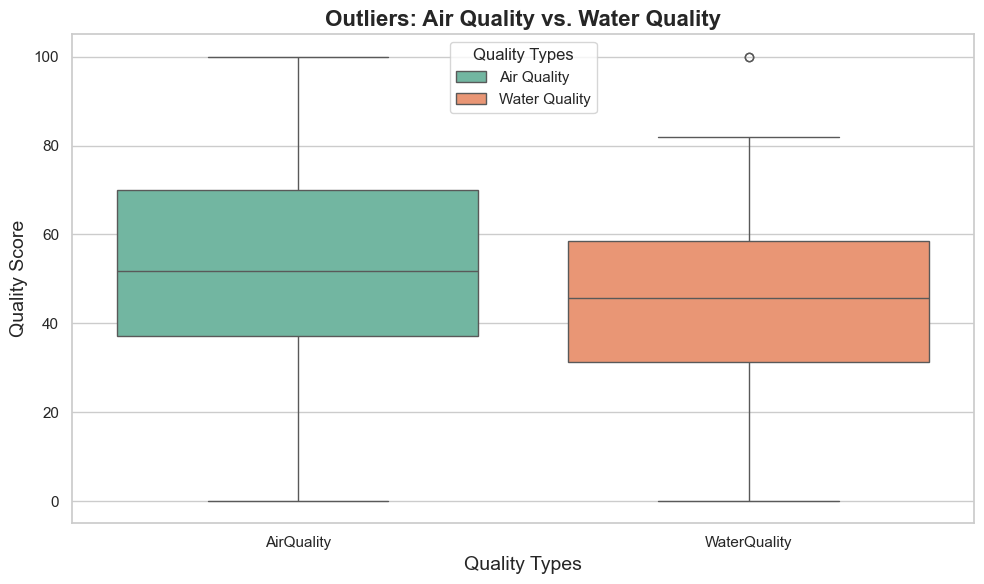

In [23]:
average_quality_scores = df.groupby("Country", as_index=False).agg({
    "AirQuality": "mean",
    "WaterQuality": "mean"
})

# Reshape the DataFrame for visualization
average_quality_scores_pivot = pd.melt(
    average_quality_scores,
    id_vars=['Country'],
    value_vars=['AirQuality', 'WaterQuality'],
    var_name='Quality_Types',
    value_name='Avg_Scores'
)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(
    x="Quality_Types",
    y="Avg_Scores",
    data=average_quality_scores_pivot,
    palette="Set2",  # Use a color palette for better aesthetics
)

# Set title and labels
plt.title("Outliers: Air Quality vs. Water Quality", fontweight="bold", fontsize=16)
plt.xlabel("Quality Types", fontsize=14)
plt.ylabel("Quality Score", fontsize=14)

# Customize the legend
plt.legend(title="Quality Types", loc="upper center", labels=["Air Quality", "Water Quality"])

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

### Key Observations

- **Air Quality** (green):
  - Median score: ~50
  - Range: 35 to 75 (IQR)
  - **Outliers**: Above 100

- **Water Quality** (orange):
  - Median score: ~45
  - Range: 35 to 60 (IQR)
  - **No outliers**

Air quality shows more variability and outliers, while water quality is more consistent.

# 3. What kind of relationship exists between average air quality and average water quality in various regions?

Intercept: 16.3815
Coefficient: [0.54820582]


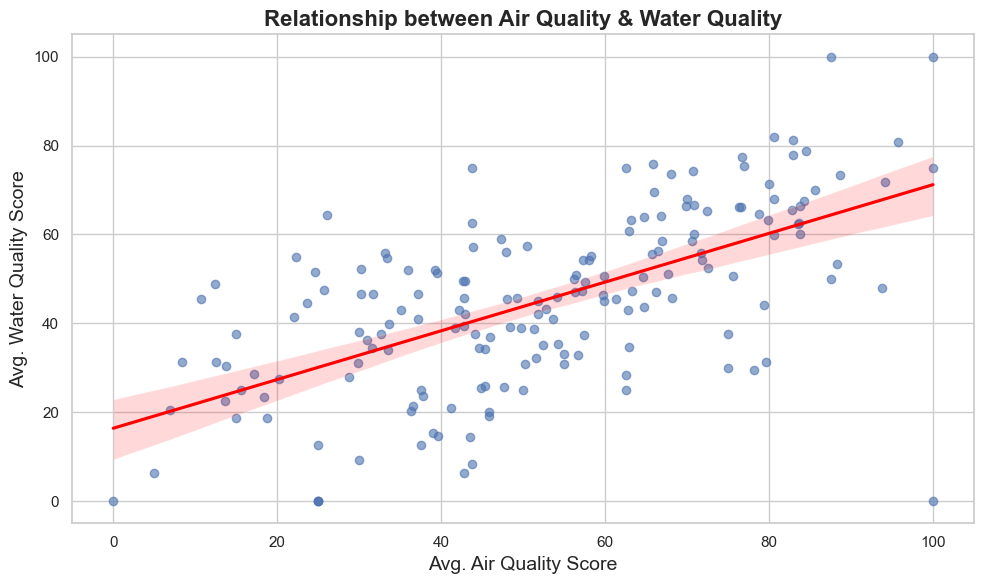

In [11]:
X = average_quality_scores[['AirQuality']]
y = average_quality_scores['WaterQuality']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the intercept and coefficients
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_}")


plt.figure(figsize=(10, 6))
sns.regplot(x='AirQuality', y='WaterQuality', data=average_quality_scores, 
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})


plt.title("Relationship between Air Quality & Water Quality", fontweight="bold", fontsize=16)
plt.xlabel("Avg. Air Quality Score", fontsize=14)
plt.ylabel("Avg. Water Quality Score", fontsize=14)

plt.tight_layout()
plt.show()

### Key Observations:

- **Positive Correlation**: The red trend line indicates a positive correlation between air quality and water quality. This means that countries with higher air quality scores tend to have higher water quality scores as well.

- **Scatter of Data Points**: While the general trend is upward, the data points are scattered, showing some variability. This suggests that not all countries with good air quality have equally good water quality and vice versa.

- **Confidence Interval**: The shaded red area around the trend line represents the confidence interval, highlighting the range in which the true relationship likely falls. There is some variability, but the positive trend is clear.


# Conclusion

This study looked into how air quality and water quality are related across various countries and identified the top performers in water quality. Our findings reveal that countries like Croatia, Singapore, and Slovenia consistently achieve exceptional water quality scores, significantly surpassing the global average of 45.26. These nations stand out due to their strong environmental management practices and reliable access to clean water, positioning them as global leaders in this area (City API IO, n.d.; U.S. Environmental Protection Agency, n.d.).

When comparing air and water quality, we noticed a significant difference in variability. Air quality scores tend to fluctuate more and show more outliers, while water quality remains relatively stable across different countries. This suggests that factors like pollution and emissions make air quality more challenging to control consistently, while effective regulations and infrastructure contribute to more uniform water quality (World Health Organization, n.d.; European Environment Agency, 2022). The scatter plot analysis showed a **positive correlation** between air quality and water quality, indicating that countries with better air quality also tend to have higher water quality. However, the spread of data points reveals that this relationship isn’t uniform across all nations. Some countries may excel in one area while lagging in the other, emphasizing the need for targeted environmental policies that address both air and water quality together (United Nations Environment Programme, 2019; National Oceanic and Atmospheric Administration, n.d.).

In summary, while a strong relationship between air and water quality exists, the variability and exceptions highlight the importance of comprehensive, integrated approaches to environmental protection. Future research could delve into the underlying factors that contribute to these discrepancies and how we can tackle them to enhance global environmental health (World Bank, n.d.; Institute for Health Metrics and Evaluation, n.d.). Ultimately, these findings stress the need for holistic environmental policies that address both air and water quality to promote long-term sustainability and improve public health outcomes (City API IO, n.d.; U.S. Environmental Protection Agency, n.d.).


## References
- City API IO. (n.d.). *World cities air quality and water pollution*. Kaggle. https://www.kaggle.com/datasets/cityapiio/world-cities-air-quality-and-water-polution/data
- European Environment Agency. (2022). *Air quality in Europe 2022: Report*. https://www.eea.europa.eu/publications/air-quality-in-europe-2022
- Institute for Health Metrics and Evaluation. (n.d.). *Global burden of disease*. http://www.healthdata.org/gbd
- National Oceanic and Atmospheric Administration. (n.d.). *Air quality index (AQI)*. https://www.airnow.gov/
- United Nations Environment Programme. (2019). *Global environment outlook – GEO-6: Healthy planet, healthy people*. https://www.unep.org/resources/global-environment-outlook-6
- U.S. Environmental Protection Agency. (n.d.). *Water quality standards*. https://www.epa.gov/wqs-tech/water-quality-standards
- World Bank. (n.d.). *World development indicators: Water quality*. https://databankfiles.worldbank.org/public/ddpext/
- World Health Organization. (n.d.). *Air quality and health*. https://www.who.int/news-room/fact-sheets/detail/air-quality-and-health